## In this project I will use the K-Nearest Neighbors algorithm to ingest, prepare, model, predict, & validate the dataset.

## Importing the libraries needed for the program.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

## Import the Credit Fraud dataset

In [2]:
data = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/csv_result-credit_fraud.csv")

## How many rows & columns are in the dataset. In this case there are 1000 rows & 22 columns

In [3]:
data.shape

(1000, 22)

## Confirm the Credit Fraud dataset is imported with a visual that prints the first 10 rows from the dataset.

In [4]:
data.head(10)

,id,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,6,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,7,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,8,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,9,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,10,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


## Begin data cleaning by checking for missing values in the dataset.

In [5]:
data.isna().sum()

id                        0
over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

## There are no missing values

## Continuing the data screening I want to see the data types in the data set to determine if i need to convert any strings to workable values.

In [6]:
data.dtypes

id                         int64
over_draft                object
credit_usage               int64
credit_history            object
purpose                   object
current_balance            int64
Average_Credit_Balance    object
employment                object
location                   int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
cc_age                     int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

## The majority of the information in this dataset are object type which are strings. This means im going to have to convert them into numbered values.

## First I need to seperate all object data types from the original dataframe into a new dataframe. Next I'll print the first 10 rows of the new dataframe to visually confirm that only categorical items exist in the new dataframe.

In [7]:
data_2 = data.select_dtypes(include=[object])
data_2.head(10)

,over_draft,credit_history,purpose,Average_Credit_Balance,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad
5,no checking,existing paid,education,no known savings,1<=X<4,male single,none,no known property,none,for free,unskilled resident,yes,yes,good
6,no checking,existing paid,furniture/equipment,500<=X<1000,>=7,male single,none,life insurance,none,own,skilled,none,yes,good
7,0<=X<200,existing paid,used car,<100,1<=X<4,male single,none,car,none,rent,high qualif/self emp/mgmt,yes,yes,good
8,no checking,existing paid,radio/tv,>=1000,4<=X<7,male div/sep,none,real estate,none,own,unskilled resident,none,yes,good
9,0<=X<200,critical/other existing credit,new car,<100,unemployed,male mar/wid,none,car,none,own,high qualif/self emp/mgmt,none,yes,bad


## 

## Now that the data is seperated I can begin the conversion process.

## First I want to instantiate the label encoder.

In [8]:
le = preprocessing.LabelEncoder()

## Now I can apply fit & transform to our original dataset which allows our program to learn the scaling parameters to test the data. Additionally we tell our program that our new dataframe is equal to the orginal, transformed dataset, which allows the data from the original dataset with columns we did not need to convert, to be included into our new dataframe.

In [9]:
data_2 = data.apply(le.fit_transform)

## Next I want to instantiate a OneHotEncoder, which makes encoding multicategorical datasets like this one much easier to work with. I also want to fit & transform this data into an array.

In [10]:
enc = preprocessing.OneHotEncoder()
enc.fit(data_2)
onehotlabels = enc.transform(data_2).toarray()
onehotlabels.shape

(1000, 2077)

## As we can see we printed the shape of onehotlabels & have the same amount of rows 1000, but now we have 2077 columns. This is just describing the amount of columns created to convert the complex multicategories in the dataset into workable values. This is not the same as the shape of our current dataframe.

## Now lets print the datatype for onehotlabels to ensure we transformed it into an array.

In [11]:
type(onehotlabels)

numpy.ndarray

## Here we can visually confirm that our onehotlabels have been transformed into an array.

In [12]:
onehotlabels

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

## 

## Now that our dataframes are cleaned & prepped, we can move onto modeling, predicting, & validating our dataset.

## Before we work any data, lets take a look at the number of current fraud detections. Good = no fraud detected, & Bad = a fraud alert.

<Axes: xlabel='class', ylabel='count'>

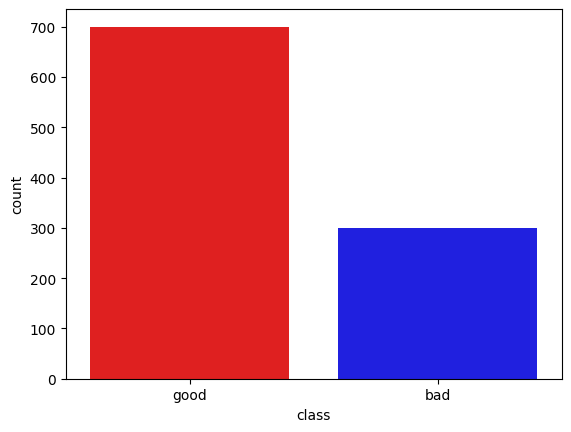

In [13]:
color = ['red', 'blue']  # Define the palette
color = color[:2]  # Select only the first 2 colors from the palette
sb.countplot(data=data, x='class', hue='class', palette=color, legend=False)

## We can see in the visual model that there are more instances of Good, than Bad.

## Before we can seperate our data into X & Y sets, we need to gather some information. First I want to visually see that all columns have been sucessfully converted, & that they include all data needed from both dataframes.

In [14]:
data_2.head(3)

,id,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,1,2,1,6,142,4,3,3,3,...,3,48,1,1,1,1,0,1,1,1
1,1,0,29,3,6,770,2,0,1,0,...,3,3,1,1,0,1,0,0,1,0
2,2,3,8,1,2,390,2,1,1,3,...,3,30,1,1,0,3,1,0,1,1


In [15]:
data_2.shape

(1000, 22)

## I still have 1000 rows & 22 collumns with all the data sucessfuly converted.

## It's time to split our data into (X)dependent & (Y) independent sets. I will account for an offset of 0. First I set all columns 0 - 20 as X, & column 21 as Y. Column 21 is our Class, which determines if an ID is Good(1) or Bad(2).

In [16]:
X = data_2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
Y = data_2.iloc[:, 21].values 

## Now I can import the training & testing from sklearn. Here I Split the data again into 80% training, 20% testing.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

##  It's time to implement the supervised algorithm. I have chosen the (KNN) K-Nearest Neighbors classifier for this dataset.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13, n_jobs=20)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=20, n_neighbors=13)

## Our algorithm is trained & we are ready to implement our prediction.

In [19]:
y_predict = knn.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## From the prediction output we can see that there are more Good cases than Bad, where 1 = Not Fraud & 0 = Fraud. This matches our visual model from earlier.

## Let's see how accurate our algorithm is. I will multiply the result scaling by 100 to make it easier to read as a percentage.

In [20]:
print('K-Nearest Neighbors Training Accuracy',knn.score(X_train, Y_train)*100,'%')

K-Nearest Neighbors Training Accuracy 71.625 %


## our accuracy score is 71.625%.

# Summary

## The predicted results had an expected good to bad ratio, which leaves me confident that the algorithm is reasonably accurate. I decided to use KNN as my algorithm of choice due to the large & complex amount of categories within the data set. Because KNN is known for its higher accuracy rates, I found that being able to use multiple clusters for the large amount of categories would make this algorithm the best choice for me. I experimented with the algorithm by modifying the number of clusters (n_neighbors) & found that if i set K between 11-19, it gives an accuracy rate between 71.25% & 71.75%. A .50% difference. If i set K between 3-9, I get between 74.25 _ 75.75%. If i set K past 19, the accuracy drops off quickly. This led me to believe that 11-19 clusters was a good range to set K at, & I chose to set K at 13 being the middle of the largest & most stable range available.

# Screenshot results

## Prediction
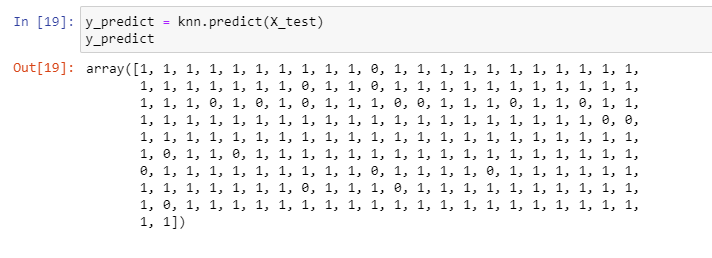
## Accuracy
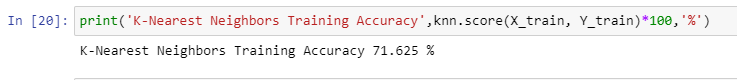

# References

## One Hot Encoding in SciKit-Learn  https://www.ritchieng.com/machinelearning-one-hot-encoding/